In [1]:
import numpy as np
from math import sin
import matplotlib.pylab as plt
%matplotlib inline

In [2]:
def euler(f,f0,a,b,h):
    
    n = int((b-a)/h)
    x = np.empty(n)
    
    x[0] = f0
    tt = np.linspace(a,b,n)
    for i, t in enumerate(tt[:-1]):
        x[i+1] = x[i] + h*f(x[i],t)
    
    return tt,x

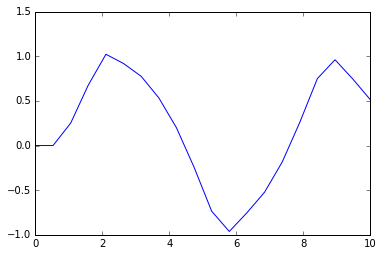

In [3]:
t,x = euler(lambda x,t: -x*x*x+sin(t), 0, 0, 10, 0.5)
plt.plot(t,x)

In [4]:
def rungekutta1(f,f0,a,b,h):
    
    n = int((b-a)/h)
    x = np.empty(n)
    
    x[0] = f0
    tt = np.linspace(a,b,n)
    for i, t in enumerate(tt[:-1]):
        k1 = h*f(x[i],t) 
        k2 = h*f(x[i]+0.5*k1,t+0.5*h)
        x[i+1] = x[i] + k2
    
    return tt,x

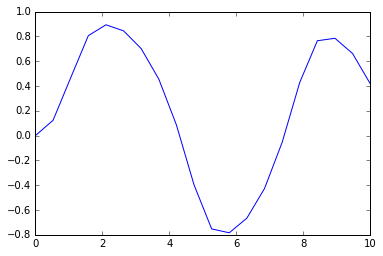

In [5]:
t,x = rungekutta1(lambda x,t: -x*x*x+sin(t), 0, 0, 10, 0.5)
plt.plot(t,x)

In [6]:
def rungekutta4(f,f0,a,b,h):
    
    n = int((b-a)/h)
    x = np.empty(n)
    
    x[0] = f0
    tt = np.linspace(a,b,n)
    for i, t in enumerate(tt[:-1]):
        k1 = h*f(x[i],t)
        k2 = h*f(x[i]+0.5*k1,t+0.5*h)
        k3 = h*f(x[i]+0.5*k2,t+0.5*h)
        k4 = h*f(x[i]+k3,t+h)
        x[i+1] = x[i] + (k1+2*k2+2*k3+k4)/6.0
    
    return tt,x

20

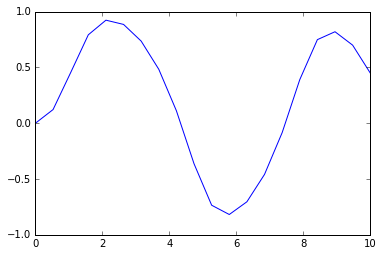

In [7]:
t,x = rungekutta4(lambda x,t: -x*x*x+sin(t), 0, 0, 10, 0.5)
plt.plot(t,x)
t.size

From [here](http://stackoverflow.com/questions/15209552/python-functions-within-lists)

You can create anonymous functions using the lambda keyword.

```python
def func(x,keyword='bar'):
    return (x,keyword)
```
is roughly equivalent to:

```python
func = lambda x,keyword='bar':(x,keyword)
```
So, if you want to create a list with functions in it:

```python
my_list = [lambda x:x**2,lambda x:x**3]
print my_list[0](2)  #4
print my_list[1](2) 
```

From [here](http://stackoverflow.com/questions/11345765/numpy-apply-an-array-of-functions-to-a-same-length-2d-array-of-value-as-if-mult)

As Sven Marnach reminded me, the array you've created is probably an array of Python objects. Any operation on them will likely be much slower than pure numpy operations. However, you can do what you've asked pretty easily, as long as you don't actually expect this to be very fast! It's not too different from what AFoglia suggested, but it's closer to being exactly what you asked for:

```python
>>> a = numpy.array([[ 1, 2.0, "three"],
...                  [ 4, 5.0, "six"  ]], dtype=object)
>>> funcs = [lambda x: x + 10, lambda x: x / 2, lambda x: x + '!']
>>> apply_vectorized = numpy.vectorize(lambda f, x: f(x), otypes=[object])
>>> apply_vectorized(funcs, a)
array([[11, 1.0, three!],
       [14, 2.5, six!]], dtype=object)
```

Also echoing AFoglia here, there's a good chance you'd be better off using a record array -- this allows you to divide the array up as you like, and work with it in a more natural way using numpy ufuncs -- which are much faster than Python functions, generally:

```python
rec.array([(1, 2.0, 'three'), (4, 5.0, 'six')], 
      dtype=[('int', '<i8'), ('float', '<f8'), ('str', '|S10')])
>>> a['int']
array([1, 4])
>>> a['float']
array([ 2.,  5.])
>>> a['str']
rec.array(['three', 'six'], 
      dtype='|S10')
>>> a['int'] += 10
>>> a['int']
array([11, 14])
```

In [10]:
def nextPoint(f,x,t,h):
    k1 = h*f(x,t)
    k2 = h*f(x+0.5*k1,t+0.5*h)
    k3 = h*f(x+0.5*k2,t+0.5*h)
    k4 = h*f(x+k3,t+h)
    return x + (k1+2*k2+2*k3+k4)/6.0    

def adaptive_rungekutta4(f,f0,a,b,d):

    eps = d*1e-3
    
    h = d**0.25
    x = f0
    xx = [x]
    t = a
    tt = [t]
    
    while t+2*h < b:
        
        x1 = nextPoint(f,x,t,h)
        x2 = nextPoint(f,x1,t,h)
        x3 = nextPoint(f,x,t,2*h)
        
        r = min(30.0*h*d/max(abs(x3-x2),eps),16.0)            
        
        while r < 1:
            h /= 2 
            x1 = nextPoint(f,x,t,h)
            x2 = nextPoint(f,x1,t,h)
            x3 = nextPoint(f,x,t,2*h)
            
            r = min(30.0*h*d/max(abs(x3-x2),eps),16.0)            
        
        h *= r**0.25
        x = x2 + (x2-x3)/15.0
        t += 2*h
        xx.append(x)
        tt.append(t)
        
    xx.append(nextPoint(f,x,t,b-t))
    tt.append(b)
            
    return np.array(tt), np.array(xx)

11416

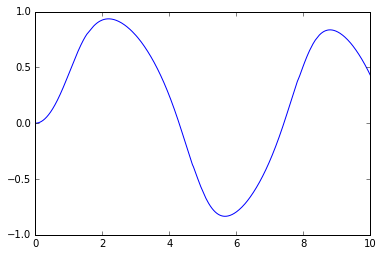

In [11]:
t,x = adaptive_rungekutta4(lambda x,t: -x*x*x+sin(t), 0, 0, 10, 0.00001)
plt.plot(t,x)
t.size